In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import timeit
#import shap
from sklearn.metrics import r2_score, mean_absolute_percentage_error, mean_squared_error
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold
from sklearn.model_selection import train_test_split

___

# Read-in and One-Hot Encoding

In [2]:
df1 = pd.read_excel("data_new/train.xlsx", sheet_name="positive_peak_time")
df2 = pd.read_excel("data_new/train.xlsx", sheet_name="negative_peak_time")
df3 = pd.read_excel("data_new/train.xlsx", sheet_name="arrival_time")
df4 = pd.read_excel("data_new/train.xlsx", sheet_name="positive_duration")
df5 = pd.read_excel("data_new/train.xlsx", sheet_name="negative_duration")
df6 = pd.read_excel("data_new/train.xlsx", sheet_name="positive_pressure")
df7 = pd.read_excel("data_new/train.xlsx", sheet_name="negative_pressure")
df8 = pd.read_excel("data_new/train.xlsx", sheet_name="positive_impulse")



dt1 = pd.read_excel("data_new/test.xlsx", sheet_name="positive_peak_time")
dt2 = pd.read_excel("data_new/test.xlsx", sheet_name="negative_peak_time")
dt3 = pd.read_excel("data_new/test.xlsx", sheet_name="arrival_time")
dt4 = pd.read_excel("data_new/test.xlsx", sheet_name="positive_duration")
dt5 = pd.read_excel("data_new/test.xlsx", sheet_name="negative_duration")
dt6 = pd.read_excel("data_new/test.xlsx", sheet_name="positive_pressure")
dt7 = pd.read_excel("data_new/test.xlsx", sheet_name="negative_pressure")
dt8 = pd.read_excel("data_new/test.xlsx", sheet_name="positive_impulse")

In [3]:
df1

,ID,Tank Failure Pressure (bar),Liquid Ratio (%),Tank Width (m),Tank Length (m),Tank Height (m),Height of BLEVE (m),Tank Height with Gas (m),Vapour Temerature (K),Liquid Temerature (K),Status,Stand-off Distance,Target
0,B291,13.6,0.665119,1.0,4.0,0.8,1.8,0.4,435.0,372.5,Superheated,5,0.012166
1,B291,13.6,0.665119,1.0,4.0,0.8,1.8,0.4,435.0,372.5,Superheated,6,0.014556
2,B291,13.6,0.665119,1.0,4.0,0.8,1.8,0.4,435.0,372.5,Superheated,7,0.017034
3,B291,13.6,0.665119,1.0,4.0,0.8,1.8,0.4,435.0,372.5,Superheated,8,0.019576
4,B291,13.6,0.665119,1.0,4.0,0.8,1.8,0.4,435.0,372.5,Superheated,9,0.022172
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21595,B103,30.7,0.181290,0.6,2.0,2.8,1.2,2.2,334.7,404.9,Subcooled,36,0.093782
21596,B103,30.7,0.181290,0.6,2.0,2.8,1.2,2.2,334.7,404.9,Subcooled,37,0.096635
21597,B103,30.7,0.181290,0.6,2.0,2.8,1.2,2.2,334.7,404.9,Subcooled,38,0.099487
21598,B103,30.7,0.181290,0.6,2.0,2.8,1.2,2.2,334.7,404.9,Subcooled,39,0.102341


In [4]:
dt1

,ID,Tank Failure Pressure (bar),Liquid Ratio (%),Tank Width (m),Tank Length (m),Tank Height (m),Height of BLEVE (m),Tank Height with Gas (m),Vapour Temerature (K),Liquid Temerature (K),Status,Stand-off Distance,Target
0,P197,11.559040,0.602823,3.0,0.8,2.2,0.2,1.0,296.7,328.5,Superheated,5,0.012114
1,P197,11.559040,0.602823,3.0,0.8,2.2,0.2,1.0,296.7,328.5,Superheated,6,0.014798
2,P197,11.559040,0.602823,3.0,0.8,2.2,0.2,1.0,296.7,328.5,Superheated,7,0.017533
3,P197,11.559040,0.602823,3.0,0.8,2.2,0.2,1.0,296.7,328.5,Superheated,8,0.020293
4,P197,11.559040,0.602823,3.0,0.8,2.2,0.2,1.0,296.7,328.5,Superheated,9,0.023077
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7195,P55,5.970915,0.284706,0.6,9.8,2.8,1.0,2.2,439.3,349.9,Superheated,36,0.091819
7196,P55,5.970915,0.284706,0.6,9.8,2.8,1.0,2.2,439.3,349.9,Superheated,37,0.094618
7197,P55,5.970915,0.284706,0.6,9.8,2.8,1.0,2.2,439.3,349.9,Superheated,38,0.097421
7198,P55,5.970915,0.284706,0.6,9.8,2.8,1.0,2.2,439.3,349.9,Superheated,39,0.100227


In [5]:
# Label encoding 'Status' feature into 0 and 1 
# 0 for Subcooled and 1 for Superheated

from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

df5['Status'] = LE.fit_transform(df5['Status'])
dt5['Status'] = LE.fit_transform(dt5['Status'])

df5

,ID,Tank Failure Pressure (bar),Liquid Ratio (%),Tank Width (m),Tank Length (m),Tank Height (m),Height of BLEVE (m),Tank Height with Gas (m),Vapour Temerature (K),Liquid Temerature (K),Status,Stand-off Distance,Target
0,B291,13.6,0.665119,1.0,4.0,0.8,1.8,0.4,435.0,372.5,1,5,0.009827
1,B291,13.6,0.665119,1.0,4.0,0.8,1.8,0.4,435.0,372.5,1,6,0.009906
2,B291,13.6,0.665119,1.0,4.0,0.8,1.8,0.4,435.0,372.5,1,7,0.009970
3,B291,13.6,0.665119,1.0,4.0,0.8,1.8,0.4,435.0,372.5,1,8,0.010039
4,B291,13.6,0.665119,1.0,4.0,0.8,1.8,0.4,435.0,372.5,1,9,0.010011
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21595,B103,30.7,0.181290,0.6,2.0,2.8,1.2,2.2,334.7,404.9,0,36,0.017944
21596,B103,30.7,0.181290,0.6,2.0,2.8,1.2,2.2,334.7,404.9,0,37,0.017724
21597,B103,30.7,0.181290,0.6,2.0,2.8,1.2,2.2,334.7,404.9,0,38,0.017498
21598,B103,30.7,0.181290,0.6,2.0,2.8,1.2,2.2,334.7,404.9,0,39,0.017280


In [6]:
dt5.iloc[30:50,:]

,ID,Tank Failure Pressure (bar),Liquid Ratio (%),Tank Width (m),Tank Length (m),Tank Height (m),Height of BLEVE (m),Tank Height with Gas (m),Vapour Temerature (K),Liquid Temerature (K),Status,Stand-off Distance,Target
30,P197,11.55904,0.602823,3.0,0.8,2.2,0.2,1.0,296.7,328.5,1,35,0.015426
31,P197,11.55904,0.602823,3.0,0.8,2.2,0.2,1.0,296.7,328.5,1,36,0.015341
32,P197,11.55904,0.602823,3.0,0.8,2.2,0.2,1.0,296.7,328.5,1,37,0.015277
33,P197,11.55904,0.602823,3.0,0.8,2.2,0.2,1.0,296.7,328.5,1,38,0.015224
34,P197,11.55904,0.602823,3.0,0.8,2.2,0.2,1.0,296.7,328.5,1,39,0.015191
35,P197,11.55904,0.602823,3.0,0.8,2.2,0.2,1.0,296.7,328.5,1,40,0.015170
36,P168,12.72223,0.648320,1.8,8.2,0.6,1.8,0.2,389.7,296.4,0,5,0.009043
37,P168,12.72223,0.648320,1.8,8.2,0.6,1.8,0.2,389.7,296.4,0,6,0.009390
38,P168,12.72223,0.648320,1.8,8.2,0.6,1.8,0.2,389.7,296.4,0,7,0.009452
39,P168,12.72223,0.648320,1.8,8.2,0.6,1.8,0.2,389.7,296.4,0,8,0.009528


In [7]:
X_traindf = df5.drop(['ID','Target'], axis=1)
X_testdf = dt5.drop(['ID','Target'], axis=1)

X_traindf

,Tank Failure Pressure (bar),Liquid Ratio (%),Tank Width (m),Tank Length (m),Tank Height (m),Height of BLEVE (m),Tank Height with Gas (m),Vapour Temerature (K),Liquid Temerature (K),Status,Stand-off Distance
0,13.6,0.665119,1.0,4.0,0.8,1.8,0.4,435.0,372.5,1,5
1,13.6,0.665119,1.0,4.0,0.8,1.8,0.4,435.0,372.5,1,6
2,13.6,0.665119,1.0,4.0,0.8,1.8,0.4,435.0,372.5,1,7
3,13.6,0.665119,1.0,4.0,0.8,1.8,0.4,435.0,372.5,1,8
4,13.6,0.665119,1.0,4.0,0.8,1.8,0.4,435.0,372.5,1,9
...,...,...,...,...,...,...,...,...,...,...,...
21595,30.7,0.181290,0.6,2.0,2.8,1.2,2.2,334.7,404.9,0,36
21596,30.7,0.181290,0.6,2.0,2.8,1.2,2.2,334.7,404.9,0,37
21597,30.7,0.181290,0.6,2.0,2.8,1.2,2.2,334.7,404.9,0,38
21598,30.7,0.181290,0.6,2.0,2.8,1.2,2.2,334.7,404.9,0,39


In [8]:
X_testdf

,Tank Failure Pressure (bar),Liquid Ratio (%),Tank Width (m),Tank Length (m),Tank Height (m),Height of BLEVE (m),Tank Height with Gas (m),Vapour Temerature (K),Liquid Temerature (K),Status,Stand-off Distance
0,11.559040,0.602823,3.0,0.8,2.2,0.2,1.0,296.7,328.5,1,5
1,11.559040,0.602823,3.0,0.8,2.2,0.2,1.0,296.7,328.5,1,6
2,11.559040,0.602823,3.0,0.8,2.2,0.2,1.0,296.7,328.5,1,7
3,11.559040,0.602823,3.0,0.8,2.2,0.2,1.0,296.7,328.5,1,8
4,11.559040,0.602823,3.0,0.8,2.2,0.2,1.0,296.7,328.5,1,9
...,...,...,...,...,...,...,...,...,...,...,...
7195,5.970915,0.284706,0.6,9.8,2.8,1.0,2.2,439.3,349.9,1,36
7196,5.970915,0.284706,0.6,9.8,2.8,1.0,2.2,439.3,349.9,1,37
7197,5.970915,0.284706,0.6,9.8,2.8,1.0,2.2,439.3,349.9,1,38
7198,5.970915,0.284706,0.6,9.8,2.8,1.0,2.2,439.3,349.9,1,39


In [9]:
y5_train = df5['Target']
y5_train

0        0.009827
1        0.009906
2        0.009970
3        0.010039
4        0.010011
           ...   
21595    0.017944
21596    0.017724
21597    0.017498
21598    0.017280
21599    0.017078
Name: Target, Length: 21600, dtype: float64

In [10]:
y1_train = df1['Target']
y2_train = df2['Target']
y3_train = df3['Target']
y4_train = df4['Target']
y6_train = df6['Target']
y7_train = df7['Target']
y8_train = df8['Target']

In [11]:
y1_test = dt1['Target']
y2_test = dt2['Target']
y3_test = dt3['Target']
y4_test = dt4['Target']
y5_test = dt5['Target']
y6_test = dt6['Target']
y7_test = dt7['Target']
y8_test = dt8['Target']

y1_test

0       0.012114
1       0.014798
2       0.017533
3       0.020293
4       0.023077
          ...   
7195    0.091819
7196    0.094618
7197    0.097421
7198    0.100227
7199    0.103035
Name: Target, Length: 7200, dtype: float64

___

# Standardization and Power Transform

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import QuantileTransformer

In [13]:
# Processing both X_train and X_test using standardization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_traindf)
X_test = scaler.transform(X_testdf)

In [14]:
# Double check if it succeeded
# df_stdscal = pd.DataFrame(X_train)
# df_stdscal.hist(figsize = (20,20), bins=10)

In [15]:
quantile1 = QuantileTransformer(output_distribution='normal')
quantile2 = QuantileTransformer(output_distribution='normal')
quantile3 = QuantileTransformer(output_distribution='normal')
quantile4 = QuantileTransformer(output_distribution='normal')
quantile5 = QuantileTransformer(output_distribution='normal')
quantile6 = QuantileTransformer(output_distribution='normal')
quantile7 = QuantileTransformer(output_distribution='normal')
quantile8 = QuantileTransformer(output_distribution='normal')


y1_train_normal = quantile1.fit_transform(y1_train.values.reshape(-1,1))
y1_test_normal = quantile1.transform(y1_test.values.reshape(-1,1))


y2_train_normal = quantile2.fit_transform(y2_train.values.reshape(-1,1))
y2_test_normal = quantile2.transform(y2_test.values.reshape(-1,1))

y3_train_normal = quantile3.fit_transform(y3_train.values.reshape(-1,1))
y3_test_normal = quantile3.transform(y3_test.values.reshape(-1,1))

y4_train_normal = quantile4.fit_transform(y4_train.values.reshape(-1,1))
y4_test_normal = quantile4.transform(y4_test.values.reshape(-1,1))

y5_train_normal = quantile5.fit_transform(y5_train.values.reshape(-1,1))
y5_test_normal = quantile5.transform(y5_test.values.reshape(-1,1))

y6_train_normal = quantile6.fit_transform(y6_train.values.reshape(-1,1))
y6_test_normal = quantile6.transform(y6_test.values.reshape(-1,1))

y7_train_normal = quantile7.fit_transform(y7_train.values.reshape(-1,1))
y7_test_normal = quantile7.transform(y7_test.values.reshape(-1,1))

y8_train_normal = quantile8.fit_transform(y8_train.values.reshape(-1,1))
y8_test_normal = quantile8.transform(y8_test.values.reshape(-1,1))

c:\Users\buita\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\buita\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


c:\Users\buita\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\buita\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


c:\Users\buita\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\buita\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


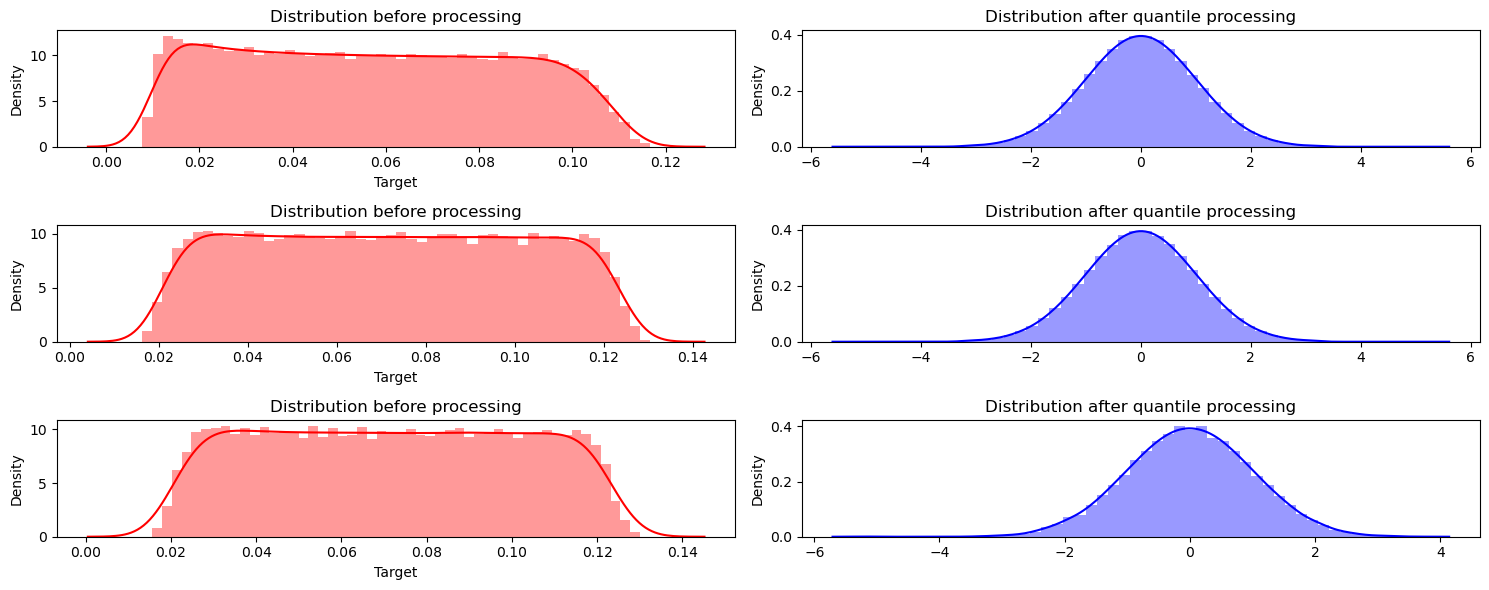

In [16]:
# Visualize the effect of power transformation
f = plt.figure(figsize=(15, 6))

ax = f.add_subplot(321)
sns.distplot(y1_train, bins=50, color='r', ax=ax)
ax.set_title('Distribution before processing')

ax=f.add_subplot(322)
sns.distplot(y1_train_normal, bins=50, color='b', ax=ax)
ax.set_title('Distribution after quantile processing')
print()

ax = f.add_subplot(323)
sns.distplot(y2_train, bins=50, color='r', ax=ax)
ax.set_title('Distribution before processing')

ax=f.add_subplot(324)
sns.distplot(y2_train_normal, bins=50, color='b', ax=ax)
ax.set_title('Distribution after quantile processing')
print()

ax = f.add_subplot(325)
sns.distplot(y2_test, bins=50, color='r', ax=ax)
ax.set_title('Distribution before processing')

ax=f.add_subplot(326)
sns.distplot(y2_test_normal, bins=50, color='b', ax=ax)
ax.set_title('Distribution after quantile processing')
print()

plt.tight_layout()

In [17]:
y1_test_check = quantile1.inverse_transform(y1_test_normal)
y1_test_check

array([[0.01211439],
       [0.01479826],
       [0.01753254],
       ...,
       [0.09742104],
       [0.1002275 ],
       [0.10303451]])

In [18]:
y1_test

0       0.012114
1       0.014798
2       0.017533
3       0.020293
4       0.023077
          ...   
7195    0.091819
7196    0.094618
7197    0.097421
7198    0.100227
7199    0.103035
Name: Target, Length: 7200, dtype: float64

In [19]:
y1_test_normal

array([[-1.89465723],
       [-1.5461956 ],
       [-1.32031725],
       ...,
       [ 1.30032046],
       [ 1.46547647],
       [ 1.66329102]])

___

# ANN

In [20]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

torch.backends.cudnn.version() , torch.backends.cudnn.enabled

(8500, True)

In [21]:
# convert data to torch.FloatTensor
X_train_torch = torch.from_numpy(X_train.astype(np.float32))
X_test_torch = torch.from_numpy(X_test.astype(np.float32))



y1_train_torch = torch.from_numpy(y1_train_normal.astype(np.float32))
y1_test_torch = torch.from_numpy(y1_test_normal.astype(np.float32))

y2_train_torch = torch.from_numpy(y2_train_normal.astype(np.float32))
y2_test_torch = torch.from_numpy(y2_test_normal.astype(np.float32))

y3_train_torch = torch.from_numpy(y3_train_normal.astype(np.float32))
y3_test_torch = torch.from_numpy(y3_test_normal.astype(np.float32))

y4_train_torch = torch.from_numpy(y4_train_normal.astype(np.float32))
y4_test_torch = torch.from_numpy(y4_test_normal.astype(np.float32))

y5_train_torch = torch.from_numpy(y5_train_normal.astype(np.float32))
y5_test_torch = torch.from_numpy(y5_test_normal.astype(np.float32))

y6_train_torch = torch.from_numpy(y6_train_normal.astype(np.float32))
y6_test_torch = torch.from_numpy(y6_test_normal.astype(np.float32))

y7_train_torch = torch.from_numpy(y7_train_normal.astype(np.float32))
y7_test_torch = torch.from_numpy(y7_test_normal.astype(np.float32))

y8_train_torch = torch.from_numpy(y8_train_normal.astype(np.float32))
y8_test_torch = torch.from_numpy(y8_test_normal.astype(np.float32))

print(X_train_torch)

tensor([[-0.8024,  0.7595, -0.9898,  ...,  0.6962,  1.3190, -1.6846],
        [-0.8024,  0.7595, -0.9898,  ...,  0.6962,  1.3190, -1.5883],
        [-0.8024,  0.7595, -0.9898,  ...,  0.6962,  1.3190, -1.4921],
        ...,
        [ 0.9096, -1.3719, -1.5129,  ...,  1.5587, -0.7582,  1.4921],
        [ 0.9096, -1.3719, -1.5129,  ...,  1.5587, -0.7582,  1.5883],
        [ 0.9096, -1.3719, -1.5129,  ...,  1.5587, -0.7582,  1.6846]])


In [22]:
y1_train_torch

tensor([[-1.8878],
        [-1.5732],
        [-1.3570],
        ...,
        [ 1.4216],
        [ 1.6162],
        [ 1.8511]])

In [23]:
y1_test_torch

tensor([[-1.8947],
        [-1.5462],
        [-1.3203],
        ...,
        [ 1.3003],
        [ 1.4655],
        [ 1.6633]])

In [24]:
train_data = []
for i in range(len(X_train_torch)):
   train_data.append([X_train_torch[i],
                      y1_train_torch[i], 
                      y2_train_torch[i],
                      y3_train_torch[i],
                      y4_train_torch[i],
                      y5_train_torch[i],
                      y6_train_torch[i],
                      y7_train_torch[i],
                      y8_train_torch[i]])

test_data = []
for i in range(len(X_test_torch)):
   test_data.append([X_test_torch[i], 
                     y1_test_torch[i],
                     y2_test_torch[i],
                     y3_test_torch[i],
                     y4_test_torch[i],
                     y5_test_torch[i],
                     y6_test_torch[i],
                     y7_test_torch[i],
                     y8_test_torch[i]])

# prepare data loaders
train_loader = torch.utils.data.DataLoader(train_data, batch_size=512,               # batch_size could be smaller
    num_workers=0)                                                                   # Increasing num_workers slow down the training because it does not use GPU at all
test_loader = torch.utils.data.DataLoader(test_data, batch_size=512,
    num_workers=0)

In [25]:
# for x,y in train_loader:
#     print(y)
#     # break

In [26]:
## Define the NN architecture
## NN with 3 hidden layer, s=[26, 256, 256, 256] -> 8*[256,128] -> 8*[128,1]

class BleveNet(nn.Module):
    def __init__(self):
        super(BleveNet, self).__init__()
        # The first hidden layer has 256 neurons
        self.fc1 = nn.Linear(X_train_torch.shape[1], 256)
        # The second hidden layer has 256 neurons
        self.fc2 = nn.Linear(256, 256)
        # The third hidden layer has 256 neurons
        self.fc3 = nn.Linear(256, 256)
        # The final layer has 1 output neuron
        self.fc4 = nn.Linear(256, 128)
        self.fc5 = nn.Linear(256, 128)
        self.fc6 = nn.Linear(256, 128)
        self.fc7 = nn.Linear(256, 128)
        self.fc8 = nn.Linear(256, 128)
        self.fc9 = nn.Linear(256, 128)
        self.fc10 = nn.Linear(256, 128)
        self.fc11 = nn.Linear(256, 128)
        
        self.fc12 = nn.Linear(128,1)
        self.fc13 = nn.Linear(128,1)
        self.fc14 = nn.Linear(128,1)
        self.fc15 = nn.Linear(128,1)
        self.fc16 = nn.Linear(128,1)
        self.fc17 = nn.Linear(128,1)
        self.fc18 = nn.Linear(128,1)
        self.fc19 = nn.Linear(128,1)
       



        # Define proportion or neurons to dropout
        self.dropout = nn.Dropout(0.1)

        # Mish activation
        self.mish = nn.Mish()


    def forward(self, x):
        # add first fully connected layer
        x = self.fc1(x)
        x = self.mish(x)
        x = self.dropout(x)
        # add second fully connected layer
        x = self.fc2(x)
        x = self.mish(x)
        x = self.dropout(x)
        # add third fully connected layer
        x = self.fc3(x)
        x = self.mish(x)
        x = self.dropout(x)
        # separated in 8 different heads and outputs
        head1 = self.fc4(x)
        head1 = self.dropout(head1)
        output1 = self.fc12(head1)

        head2 = self.fc5(x)
        head2 = self.dropout(head2)
        output2 = self.fc13(head2)

        head3 = self.fc6(x)
        head3 = self.dropout(head3)
        output3 = self.fc14(head3)

        head4 = self.fc7(x)
        head4 = self.dropout(head4)
        output4 = self.fc15(head4)

        head5 = self.fc8(x)
        head5 = self.dropout(head5)
        output5 = self.fc16(head5)

        head6 = self.fc9(x)
        head6 = self.dropout(head6)
        output6 = self.fc17(head6)

        head7 = self.fc10(x)
        head7 = self.dropout(head7)
        output7 = self.fc18(head7)

        head8 = self.fc10(x)
        head8 = self.dropout(head8)
        output8 = self.fc19(head8)


        
       
        return output1, output2, output3, output4, output5, output6, output7, output8

# initialize the NN
model = BleveNet()
print(model)

BleveNet(
  (fc1): Linear(in_features=11, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=256, bias=True)
  (fc4): Linear(in_features=256, out_features=128, bias=True)
  (fc5): Linear(in_features=256, out_features=128, bias=True)
  (fc6): Linear(in_features=256, out_features=128, bias=True)
  (fc7): Linear(in_features=256, out_features=128, bias=True)
  (fc8): Linear(in_features=256, out_features=128, bias=True)
  (fc9): Linear(in_features=256, out_features=128, bias=True)
  (fc10): Linear(in_features=256, out_features=128, bias=True)
  (fc11): Linear(in_features=256, out_features=128, bias=True)
  (fc12): Linear(in_features=128, out_features=1, bias=True)
  (fc13): Linear(in_features=128, out_features=1, bias=True)
  (fc14): Linear(in_features=128, out_features=1, bias=True)
  (fc15): Linear(in_features=128, out_features=1, bias=True)
  (fc16): Linear(in_features=128, out_features=1, bias=True)
  

In [27]:
criterion = nn.HuberLoss()        # This is the best loss function for my model
# criterion = nn.MSELoss()


optimizer = torch.optim.Adam(model.parameters(), lr=0.005, weight_decay=1e-5)     # This is the best optimizer for my model 

# Check for GPU
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [28]:
startTime = timeit.default_timer() 


n_epochs = 200 

model.to(device)    # bring the model to gpu
model.train()       # prep model for training

train_losses = []
for epoch in range(n_epochs):
    # monitor training loss
    train_loss = 0.0
    
    ###################
    # train the model #
    ###################
    for data, target1, target2, target3, target4, target5, target6, target7, target8 in train_loader:
        # clear the gradients of all optimized variables
        optimizer.zero_grad()
        #bring data and target to gpu
        data, target1 = data.to(device), target1.to(device)
        target2, target3 = target2.to(device), target3.to(device)
        target4, target5 = target4.to(device), target5.to(device)
        target6, target7 = target6.to(device), target7.to(device)
        target8 = target8.to(device)
        
        # forward pass: compute predicted outputs by passing inputs to the model
        output1, output2, output3, output4, output5, output6, output7, output8 = model(data)

        # calculate the loss
        loss1 = criterion(output1, target1)
        loss2 = criterion(output2, target2)
        loss3 = criterion(output3, target3)
        loss4 = criterion(output4, target4)
        loss5 = criterion(output5, target5)
        loss6 = criterion(output6, target6)
        loss7 = criterion(output7, target7)
        loss8 = criterion(output8, target8)
        loss = loss1 + loss2 + loss3 + loss4 + loss5 + loss6 + loss7 + loss8
        
        # backward pass: compute gradient of the loss with respect to model parameters
        loss.backward()
        # perform a single optimization step (parameter update)
        optimizer.step()
        # update running training loss
        train_loss += loss.item()*data.size(0)
        
    # print training statistics 
    # calculate average loss over an epoch
    train_loss = train_loss/len(train_loader.dataset)
    train_losses.append(train_loss)

    print('Epoch: {}/{} \tTraining Loss: {:.6f}'.format(
        epoch+1,
        n_epochs, 
        train_loss
        ))
    
endTime = timeit.default_timer()
runningTotal = (endTime - startTime)
print(f"Time taken: {runningTotal}")

Epoch: 1/200 	Training Loss: 0.804770
Epoch: 2/200 	Training Loss: 0.319097
Epoch: 3/200 	Training Loss: 0.265276
Epoch: 4/200 	Training Loss: 0.259280
Epoch: 5/200 	Training Loss: 0.219267
Epoch: 6/200 	Training Loss: 0.252446
Epoch: 7/200 	Training Loss: 0.215332
Epoch: 8/200 	Training Loss: 0.221950
Epoch: 9/200 	Training Loss: 0.201562
Epoch: 10/200 	Training Loss: 0.221735
Epoch: 11/200 	Training Loss: 0.176637
Epoch: 12/200 	Training Loss: 0.182414
Epoch: 13/200 	Training Loss: 0.174332
Epoch: 14/200 	Training Loss: 0.173352
Epoch: 15/200 	Training Loss: 0.224593
Epoch: 16/200 	Training Loss: 0.215581
Epoch: 17/200 	Training Loss: 0.212735
Epoch: 18/200 	Training Loss: 0.189524
Epoch: 19/200 	Training Loss: 0.191341
Epoch: 20/200 	Training Loss: 0.166280
Epoch: 21/200 	Training Loss: 0.138987
Epoch: 22/200 	Training Loss: 0.171667
Epoch: 23/200 	Training Loss: 0.132444
Epoch: 24/200 	Training Loss: 0.139486
Epoch: 25/200 	Training Loss: 0.159870
Epoch: 26/200 	Training Loss: 0.15

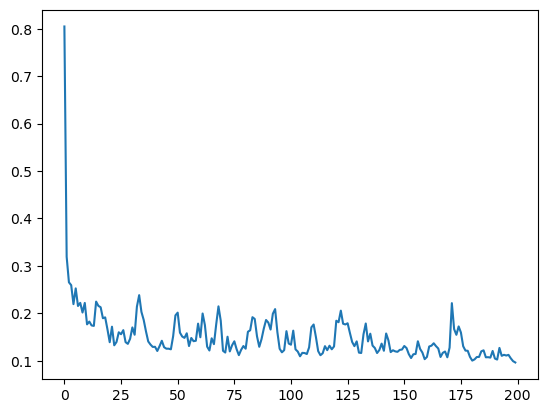

In [56]:
plt.plot(train_losses)

# Save the model  -- I already saved this and submitted
# torch.save(model.state_dict(), 'PyTorch_Model/Multi-task_NN_mish_Drop_L2_Huber_200Epoch.pt')

In [30]:
# with torch.no_grad():
#     output1, output2, output3, output4, output5, output6, output7, output8 = model(X_train_torch.to(device))

# y1_predtrain = quantile1.inverse_transform(output1.cpu().numpy())
# mape = mean_absolute_percentage_error(y1_train, y1_predtrain)
# r2 = r2_score(y1_train, y1_predtrain)
# rmse = np.sqrt(mean_squared_error(y1_train, y1_predtrain))
# r2, mape

**Loading the saved state**

In [53]:
model.load_state_dict(torch.load('PyTorch_Model/Multi-task_NN_mish_Drop_L2_Huber_200Epoch.pt', map_location=torch.device('cpu')))

model.eval()           # prep model for *evaluation*
model.to(device)
with torch.no_grad():  # turn off gradient to save memory
    y1_predNN_torch, y2_predNN_torch, y3_predNN_torch, y4_predNN_torch, y5_predNN_torch, y6_predNN_torch, y7_predNN_torch, y8_predNN_torch  = model(X_test_torch.to(device))

y1_predNN_normal = y1_predNN_torch.cpu().numpy()     # convert to numpy array
y1_test_normal = y1_test_torch.cpu().numpy()

y2_predNN_normal = y2_predNN_torch.cpu().numpy()     # convert to numpy array
y2_test_normal = y2_test_torch.cpu().numpy()

y3_predNN_normal = y3_predNN_torch.cpu().numpy()     # convert to numpy array
y3_test_normal = y3_test_torch.cpu().numpy()

y4_predNN_normal = y4_predNN_torch.cpu().numpy()     # convert to numpy array
y4_test_normal = y4_test_torch.cpu().numpy()

y5_predNN_normal = y5_predNN_torch.cpu().numpy()     # convert to numpy array
y5_test_normal = y5_test_torch.cpu().numpy()

y6_predNN_normal = y6_predNN_torch.cpu().numpy()     # convert to numpy array
y6_test_normal = y6_test_torch.cpu().numpy()

y7_predNN_normal = y7_predNN_torch.cpu().numpy()     # convert to numpy array
y7_test_normal = y7_test_torch.cpu().numpy()

y8_predNN_normal = y8_predNN_torch.cpu().numpy()     # convert to numpy array
y8_test_normal = y8_test_torch.cpu().numpy()

print(y1_predNN_normal)

[[-1.9194428]
 [-1.6384695]
 [-1.3731155]
 ...
 [ 1.3096874]
 [ 1.4711312]
 [ 1.6302645]]


In [54]:
mape = mean_absolute_percentage_error(y1_test_normal, y1_predNN_normal)
r2 = r2_score(y1_test_normal, y1_predNN_normal)
rmse = np.sqrt(mean_squared_error(y1_test_normal, y1_predNN_normal))
print(f"Scores in normal distribution: r2 = {r2}, mape = {mape}, rmse = {rmse}")

Scores in normal distribution: r2 = 0.9948736283534677, mape = 0.5883902907371521, rmse = 0.0712156668305397


___

# Positive Peak Time

In [55]:
y1_predNN = quantile1.inverse_transform(y1_predNN_normal)
mape = mean_absolute_percentage_error(y1_test, y1_predNN)
r2 = r2_score(y1_test, y1_predNN)
rmse = np.sqrt(mean_squared_error(y1_test, y1_predNN))


print(f"Scores in actual distribution for arrival time: r2 = {r2}, mape = {mape}, rmse = {rmse}")

Scores in actual distribution for arrival time: r2 = 0.9967259371177452, mape = 0.02844841397522566, rmse = 0.0016433555837151045


In [56]:
y1_test

0       0.012114
1       0.014798
2       0.017533
3       0.020293
4       0.023077
          ...   
7195    0.091819
7196    0.094618
7197    0.097421
7198    0.100227
7199    0.103035
Name: Target, Length: 7200, dtype: float64

In [57]:
y1_predNN

array([[0.01197881],
       [0.01385951],
       [0.01681586],
       ...,
       [0.09757494],
       [0.10030469],
       [0.10259076]], dtype=float32)

___

# Negative Peak Time

In [58]:
y2_predNN = quantile2.inverse_transform(y2_predNN_normal)
mape = mean_absolute_percentage_error(y2_test, y2_predNN)
r2 = r2_score(y2_test, y2_predNN)
rmse = np.sqrt(mean_squared_error(y2_test, y2_predNN))


print(f"Scores in actual distribution for arrival time: r2 = {r2}, mape = {mape}, rmse = {rmse}")

Scores in actual distribution for arrival time: r2 = 0.9957001488527387, mape = 0.024652412244704165, rmse = 0.001957604444991494


In [59]:
y2_test

0       0.023626
1       0.026637
2       0.029588
3       0.032553
4       0.035477
          ...   
7195    0.105469
7196    0.108324
7197    0.111183
7198    0.114052
7199    0.116930
Name: Target, Length: 7200, dtype: float64

___

# Arrival Time

In [60]:
y3_predNN = quantile3.inverse_transform(y3_predNN_normal)
mape = mean_absolute_percentage_error(y3_test, y3_predNN.astype('float64'))
r2 = r2_score(y3_test, y3_predNN)
rmse = np.sqrt(mean_squared_error(y3_test, y3_predNN))


print(f"Scores in actual distribution for arrival time: r2 = {r2}, mape = {mape}, rmse = {rmse}")

Scores in actual distribution for arrival time: r2 = 0.9971603348394354, mape = 0.029041946952482363, rmse = 0.0014772768773797691


In [61]:
y3_predNN = quantile3.inverse_transform(y3_predNN_normal)
mape = mean_absolute_percentage_error(y3_test, y3_predNN)
r2 = r2_score(y3_test, y3_predNN)
rmse = np.sqrt(mean_squared_error(y3_test, y3_predNN))


print(f"Scores in actual distribution for arrival time: r2 = {r2}, mape = {mape}, rmse = {rmse}")

Scores in actual distribution for arrival time: r2 = 0.9971603348394354, mape = 0.029041946952482363, rmse = 0.0014772768773797691


In [62]:
y3_test

0       0.009646
1       0.012093
2       0.014611
3       0.017177
4       0.019785
          ...   
7195    0.087402
7196    0.090136
7197    0.092877
7198    0.095618
7199    0.098365
Name: Target, Length: 7200, dtype: float64

___

# Positive Duration

In [63]:
y4_predNN = quantile4.inverse_transform(y4_predNN_normal)
mape = mean_absolute_percentage_error(y4_test, y4_predNN)
r2 = r2_score(y4_test, y4_predNN)
rmse = np.sqrt(mean_squared_error(y4_test, y4_predNN))


print(f"Scores in actual distribution for arrival time: r2 = {r2}, mape = {mape}, rmse = {rmse}")

Scores in actual distribution for arrival time: r2 = 0.9260981317842575, mape = 0.05594009778090301, rmse = 0.0009190091089050808


In [64]:
y4_test

0       0.007010
1       0.007732
2       0.008249
3       0.008734
4       0.009039
          ...   
7195    0.011811
7196    0.011917
7197    0.012019
7198    0.012124
7199    0.012225
Name: Target, Length: 7200, dtype: float64

___

# Negative Duration

In [65]:
y5_predNN = quantile5.inverse_transform(y5_predNN_normal)
mape = mean_absolute_percentage_error(y5_test, y5_predNN)
r2 = r2_score(y5_test, y5_predNN)
rmse = np.sqrt(mean_squared_error(y5_test, y5_predNN))


print(f"Scores in actual distribution for arrival time: r2 = {r2}, mape = {mape}, rmse = {rmse}")

Scores in actual distribution for arrival time: r2 = 0.9587325114799202, mape = 0.05720634654488363, rmse = 0.0012787530003012986


In [66]:
y5_test[100:120]

100    0.007093
101    0.007088
102    0.007090
103    0.007085
104    0.007079
105    0.007068
106    0.007064
107    0.007045
108    0.009888
109    0.010129
110    0.010376
111    0.010301
112    0.010790
113    0.010871
114    0.010731
115    0.010871
116    0.011529
117    0.011713
118    0.012421
119    0.012635
Name: Target, dtype: float64

In [67]:
y5_predNN[100:120]

array([[0.00857496],
       [0.00859651],
       [0.0086176 ],
       [0.00865063],
       [0.00869682],
       [0.00876266],
       [0.00887861],
       [0.00895185],
       [0.01142341],
       [0.01164612],
       [0.01180751],
       [0.01193083],
       [0.01206369],
       [0.01220614],
       [0.01233743],
       [0.01246568],
       [0.01256511],
       [0.01265279],
       [0.01272844],
       [0.01280153]], dtype=float32)

___

# Positive Pressure

In [68]:
y6_predNN = quantile6.inverse_transform(y6_predNN_normal)
mape = mean_absolute_percentage_error(y6_test, y6_predNN)
r2 = r2_score(y6_test, y6_predNN)
rmse = np.sqrt(mean_squared_error(y6_test, y6_predNN))


print(f"Scores in actual distribution for arrival time: r2 = {r2}, mape = {mape}, rmse = {rmse}")

Scores in actual distribution for arrival time: r2 = 0.9672785790973648, mape = 0.09993039853922635, rmse = 0.06037206723185116


In [69]:
y6_test

0       0.250616
1       0.200787
2       0.166701
3       0.142053
4       0.123448
          ...   
7195    0.097647
7196    0.094047
7197    0.090670
7198    0.087499
7199    0.084514
Name: Target, Length: 7200, dtype: float64

In [70]:
y6_predNN

array([[0.20796554],
       [0.16939579],
       [0.13651013],
       ...,
       [0.08466201],
       [0.08055387],
       [0.07638446]], dtype=float32)

___

# Negative Pressure

In [71]:
y7_predNN = quantile7.inverse_transform(y7_predNN_normal)
mape = mean_absolute_percentage_error(y7_test, y7_predNN)
r2 = r2_score(y7_test, y7_predNN)
rmse = np.sqrt(mean_squared_error(y7_test, y7_predNN))


print(f"Scores in actual distribution for arrival time: r2 = {r2}, mape = {mape}, rmse = {rmse}")

Scores in actual distribution for arrival time: r2 = 0.9804488891467482, mape = 0.08010598524001267, rmse = 0.01096618953403679


In [72]:
y7_test[1010:1020]

1010   -0.139212
1011   -0.132530
1012   -0.121560
1013   -0.108367
1014   -0.096830
1015   -0.094761
1016   -0.090152
1017   -0.083977
1018   -0.076700
1019   -0.069374
Name: Target, dtype: float64

In [73]:
y7_predNN[1010:1020]

array([[-0.1221595 ],
       [-0.11056283],
       [-0.10115847],
       [-0.09340205],
       [-0.08657801],
       [-0.08070184],
       [-0.07544601],
       [-0.07047741],
       [-0.06615791],
       [-0.06226857]], dtype=float32)

___

# Positive Impulse

In [74]:
y8_predNN = quantile8.inverse_transform(y8_predNN_normal)
mape = mean_absolute_percentage_error(y8_test, y8_predNN)
r2 = r2_score(y8_test, y8_predNN)
rmse = np.sqrt(mean_squared_error(y8_test, y8_predNN))


print(f"Scores in actual distribution for arrival time: r2 = {r2}, mape = {mape}, rmse = {rmse}")

Scores in actual distribution for arrival time: r2 = 0.9739126520406444, mape = 0.1139248224507529, rmse = 16.30826191012047


In [75]:
y8_test

0       52.619038
1       46.055485
2       41.131420
3       37.347630
4       34.215847
          ...    
7195    37.768711
7196    36.680138
7197    35.652153
7198    34.679951
7199    33.759022
Name: Target, Length: 7200, dtype: float64

In [76]:
y8_predNN

array([[40.88451 ],
       [35.554165],
       [30.658855],
       ...,
       [34.720886],
       [33.52476 ],
       [32.26885 ]], dtype=float32)

In [77]:
y8_predNN[:10]

array([[40.88451 ],
       [35.554165],
       [30.658855],
       [26.945759],
       [24.08429 ],
       [21.766232],
       [19.701077],
       [17.990992],
       [16.533268],
       [15.28911 ]], dtype=float32)